In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf    
import keras
from keras import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from tqdm import tqdm
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

In [2]:
data=pd.read_csv('weather_data.csv')
weather_data=data.copy()
weather_data

,datetime,temp,dew,humidity,precip,precipprob,windspeed,winddir,cloudcover,visibility,solarradiation,solarenergy,uvindex,conditions,icon,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,1/1/2018 0:00,22.0,19.0,83.16,0.000,0,3.6,40.0,78.6,5.0,0.0,NaN,0.0,Partially cloudy,partly-cloudy-night,NaN,NaN,NaN,NaN
1,1/1/2018 1:00,21.9,19.4,86.13,2.989,100,3.6,79.0,78.6,8.6,0.0,NaN,0.0,"Rain, Partially cloudy",rain,NaN,NaN,NaN,NaN
2,1/1/2018 2:00,21.0,19.0,88.39,0.000,0,3.6,350.0,78.6,5.0,0.0,NaN,0.0,Partially cloudy,partly-cloudy-night,NaN,NaN,NaN,NaN
3,1/1/2018 3:00,21.0,20.0,94.04,0.000,0,0.0,0.0,78.6,5.0,0.0,NaN,0.0,Partially cloudy,partly-cloudy-night,NaN,NaN,NaN,NaN
4,1/1/2018 4:00,21.1,19.9,92.80,0.000,0,0.0,360.0,78.6,8.6,0.0,NaN,0.0,Partially cloudy,partly-cloudy-night,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,12/31/2022 19:00,21.2,17.0,76.94,0.000,0,11.0,357.0,78.6,17.1,0.0,NaN,0.0,Partially cloudy,partly-cloudy-night,NaN,NaN,NaN,NaN
43820,12/31/2022 20:00,21.0,16.0,73.16,0.000,0,14.8,350.0,50.1,10.0,0.0,NaN,0.0,Partially cloudy,partly-cloudy-night,NaN,NaN,NaN,NaN
43821,12/31/2022 21:00,21.0,16.0,73.16,0.000,0,5.4,320.0,50.1,10.0,0.0,NaN,0.0,Partially cloudy,partly-cloudy-night,NaN,NaN,NaN,NaN
43822,12/31/2022 22:00,20.9,16.1,74.14,0.000,0,4.1,320.0,96.6,17.1,0.0,NaN,0.0,Overcast,cloudy,NaN,NaN,NaN,NaN


In [3]:
#chuyển cột 'datetime' sang định dạng thời gian và đặt cột 'datetime' làm index cho dataframe
def convert_datetime(weather_data):
    weather_data['datetime'] = pd.to_datetime(weather_data['datetime'])
    weather_data =weather_data.set_index(pd.DatetimeIndex(weather_data['datetime']))
    return weather_data
weather_data=convert_datetime(weather_data)
weather_data.head()

,datetime,temp,dew,humidity,precip,precipprob,windspeed,winddir,cloudcover,visibility,solarradiation,solarenergy,uvindex,conditions,icon,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
datetime,,,,,,,,,,,,,,,,,,,
2018-01-01 00:00:00,2018-01-01 00:00:00,22.0,19.0,83.16,0.000,0,3.6,40.0,78.6,5.0,0.0,NaN,0.0,Partially cloudy,partly-cloudy-night,NaN,NaN,NaN,NaN
2018-01-01 01:00:00,2018-01-01 01:00:00,21.9,19.4,86.13,2.989,100,3.6,79.0,78.6,8.6,0.0,NaN,0.0,"Rain, Partially cloudy",rain,NaN,NaN,NaN,NaN
2018-01-01 02:00:00,2018-01-01 02:00:00,21.0,19.0,88.39,0.000,0,3.6,350.0,78.6,5.0,0.0,NaN,0.0,Partially cloudy,partly-cloudy-night,NaN,NaN,NaN,NaN
2018-01-01 03:00:00,2018-01-01 03:00:00,21.0,20.0,94.04,0.000,0,0.0,0.0,78.6,5.0,0.0,NaN,0.0,Partially cloudy,partly-cloudy-night,NaN,NaN,NaN,NaN
2018-01-01 04:00:00,2018-01-01 04:00:00,21.1,19.9,92.80,0.000,0,0.0,360.0,78.6,8.6,0.0,NaN,0.0,Partially cloudy,partly-cloudy-night,NaN,NaN,NaN,NaN


In [4]:
y = pd.DataFrame(weather_data[['conditions','precipprob']])
X = pd.DataFrame(weather_data[['temp','dew','humidity','precip','windspeed','winddir','cloudcover','visibility','solarradiation','solarenergy','conditions','precipprob']])

In [5]:
X.isnull().sum()

temp                  0
dew                   0
humidity              0
precip                0
windspeed             0
winddir               0
cloudcover            0
visibility           83
solarradiation       12
solarenergy       20198
conditions            0
precipprob            0
dtype: int64

In [6]:
def fill_nan(weather_data):
    weather_data['solarenergy']=weather_data['solarenergy'].fillna(0) #vì những giá trị nan là thời gian không có ánh sáng mặt trời mạnh
    weather_data['visibility']=weather_data['visibility'].fillna(weather_data['visibility'].mean())
    weather_data['solarradiation']=weather_data['solarradiation'].fillna(weather_data['solarradiation'].mean())
    return weather_data

X=fill_nan(X)

In [7]:
# X['temp'] = X['temp'] / 100
# X['winddir'] = X['winddir'] / 360
# X['windspeed'] = X['windspeed'] / 360
# X['humidity'] = X['humidity'] / 100

In [7]:
y['conditions'].value_counts()

Partially cloudy          40122
Overcast                   1648
Rain, Partially cloudy     1276
Rain, Overcast              650
Clear                       128
Name: conditions, dtype: int64

array([[<AxesSubplot: title={'center': 'conditions'}>,
        <AxesSubplot: title={'center': 'precipprob'}>]], dtype=object)

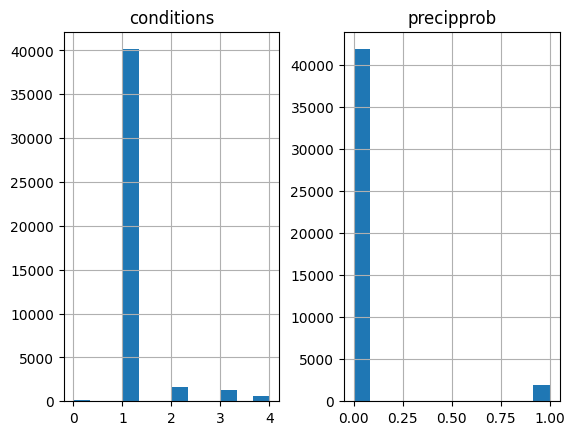

In [8]:
#xử lý dữ liệu string
# from sklearn.preprocessing import LabelEncoder

# encoder = LabelEncoder()

# y['conditions'] =encoder.fit_transform(y['conditions']) # dự báo nhãn thời tiết
# X['conditions'] = encoder.fit_transform(X['conditions'])
# y.loc[y['precipprob']==100,'precipprob']=1 # để dự báo khả năng có mưa 
# y['conditions']
# y.hist(bins=12)

y['conditions'] = y['conditions'].replace('Clear', 0)
y['conditions'] = y['conditions'].replace('Partially cloudy', 1)
y['conditions'] = y['conditions'].replace('Overcast', 2)
y['conditions'] = y['conditions'].replace('Rain, Partially cloudy', 3)
y['conditions'] = y['conditions'].replace('Rain, Overcast', 4)

X['conditions'] = X['conditions'].replace('Clear', 0)
X['conditions'] = X['conditions'].replace('Partially cloudy', 1)
X['conditions'] = X['conditions'].replace('Overcast', 2)
X['conditions'] = X['conditions'].replace('Rain, Partially cloudy', 3)
X['conditions'] = X['conditions'].replace('Rain, Overcast', 4)
y.loc[y['precipprob']==100,'precipprob']=1
y['conditions']
y.hist(bins=12)

In [9]:
y['conditions'].value_counts()

1    40122
2     1648
3     1276
4      650
0      128
Name: conditions, dtype: int64

In [15]:
weather_data["datetime"]=pd.to_datetime(weather_data["datetime"],format="%Y%m%d-%H:%M")
weather_data=weather_data.set_index("datetime")

In [104]:
data = weather_data['precip']
data

datetime
2018-01-01 00:00:00    0.000
2018-01-01 01:00:00    2.989
2018-01-01 02:00:00    0.000
2018-01-01 03:00:00    0.000
2018-01-01 04:00:00    0.000
                       ...  
2022-12-31 19:00:00    0.000
2022-12-31 20:00:00    0.000
2022-12-31 21:00:00    0.000
2022-12-31 22:00:00    0.000
2022-12-31 23:00:00    0.000
Name: precip, Length: 43824, dtype: float64

In [20]:
daily_mean=data.groupby(data.index.day).mean()
monthly_mean=data.groupby(data.index.month).mean()
hourly_mean=data.groupby(data.index.hour).mean()
yearly_mean=data.groupby(data.index.year).mean()

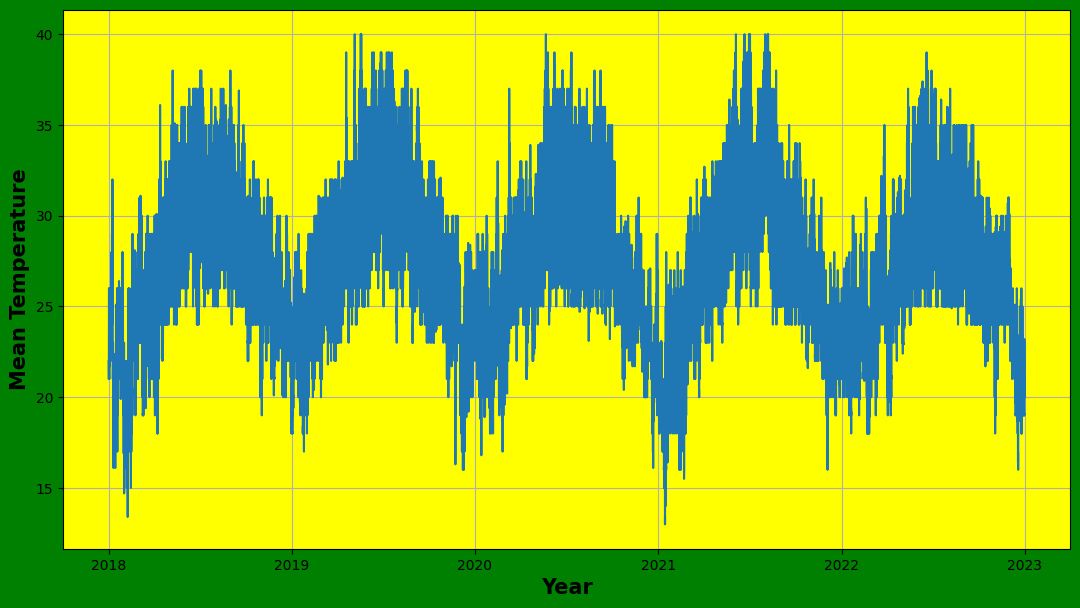

In [21]:
fig=plt.figure(figsize=(13,7),facecolor="green")
ax = plt.axes()
ax.set_facecolor("yellow")
plt.xlabel("Year",fontsize="15",fontweight="bold")
plt.ylabel("Mean Temperature",fontsize="15",fontweight="bold")
plt.grid(True)
plt.plot(data)
plt.show()

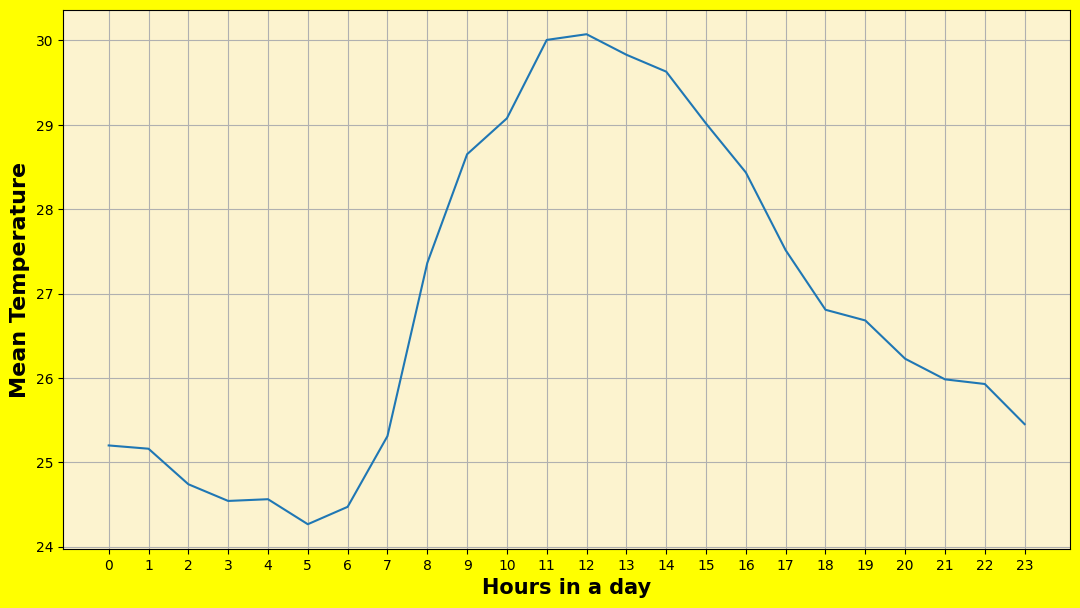

In [22]:
fig=plt.figure(figsize=(13,7),facecolor="yellow")
ax=plt.axes()
ax.set_facecolor("#FCF3CF")
plt.plot(hourly_mean)
plt.grid(True)
plt.xticks(range(0,24))
plt.xlabel("Hours in a day",fontsize=15,fontweight="bold")
plt.ylabel("Mean Temperature",fontsize=16,fontweight="bold")
plt.show()

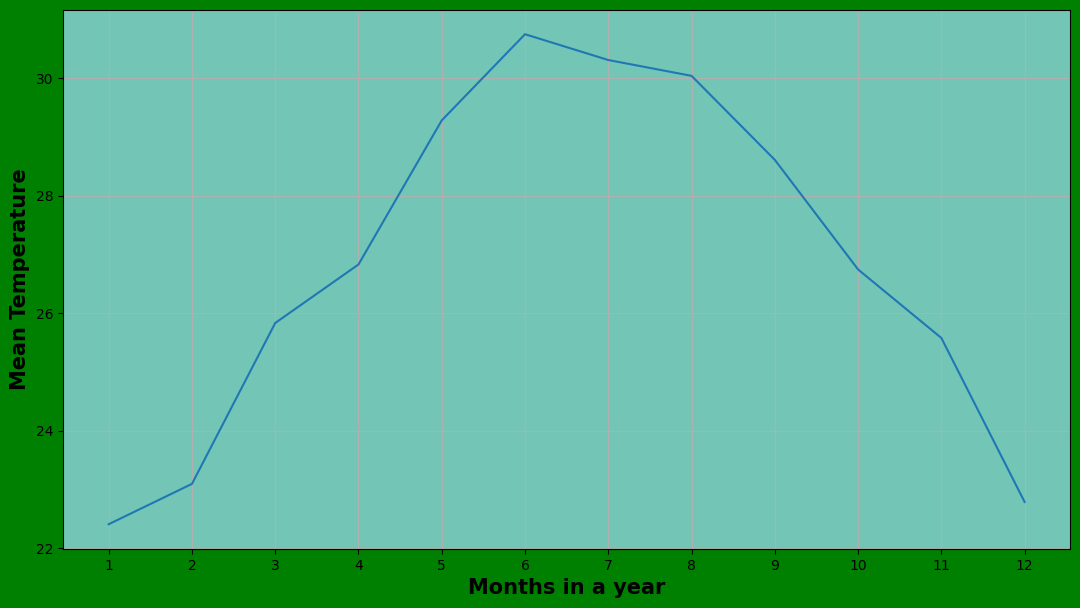

In [23]:
fig=plt.figure(figsize=(13,7),facecolor="green")
ax=plt.axes()
ax.set_facecolor("#73C6B6")
plt.plot(monthly_mean)
plt.grid(True)
plt.xticks(range(1,13))
plt.xlabel("Months in a year",fontsize=15,fontweight="bold")
plt.ylabel("Mean Temperature",fontsize=15,fontweight="bold")
plt.show()

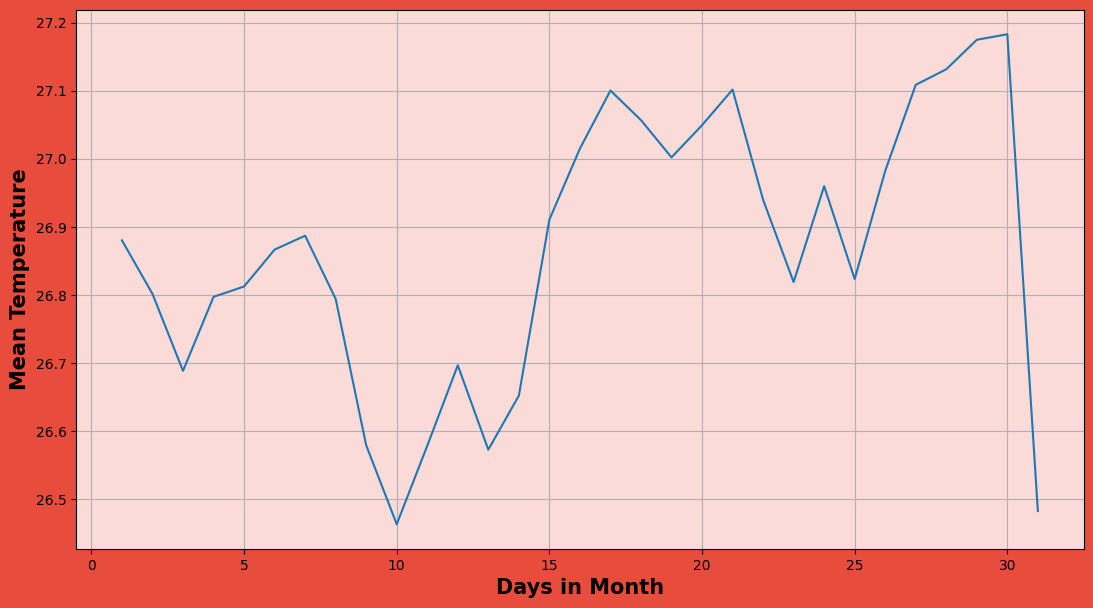

In [24]:
fig=plt.figure(figsize=(13,7),facecolor="#E74C3C")
ax=plt.axes()
ax.set_facecolor("#FADBD8")
plt.plot(daily_mean)
plt.grid(True)
plt.xlabel("Days in Month",fontsize=15,fontweight="bold")
plt.ylabel("Mean Temperature",fontsize=15,fontweight="bold")
plt.show()

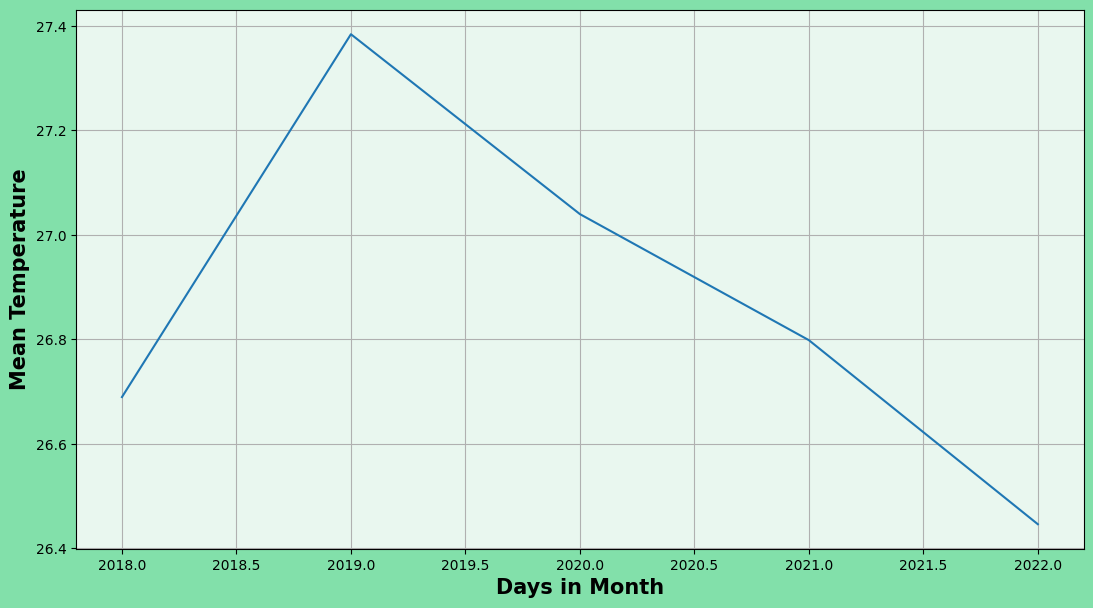

In [25]:
fig=plt.figure(figsize=(13,7),facecolor="#82E0AA")
ax=plt.axes()
ax.set_facecolor("#E9F7EF")
plt.plot(yearly_mean)
plt.grid(True)
plt.xlabel("Days in Month",fontsize=15,fontweight="bold")
plt.ylabel("Mean Temperature",fontsize=15,fontweight="bold")
plt.show()

In [26]:
daily=data.resample("D").mean()
print("Sample reduced by {} rows after resampling".format(data.shape[0]-daily.shape[0]))

Sample reduced by 41998 rows after resampling


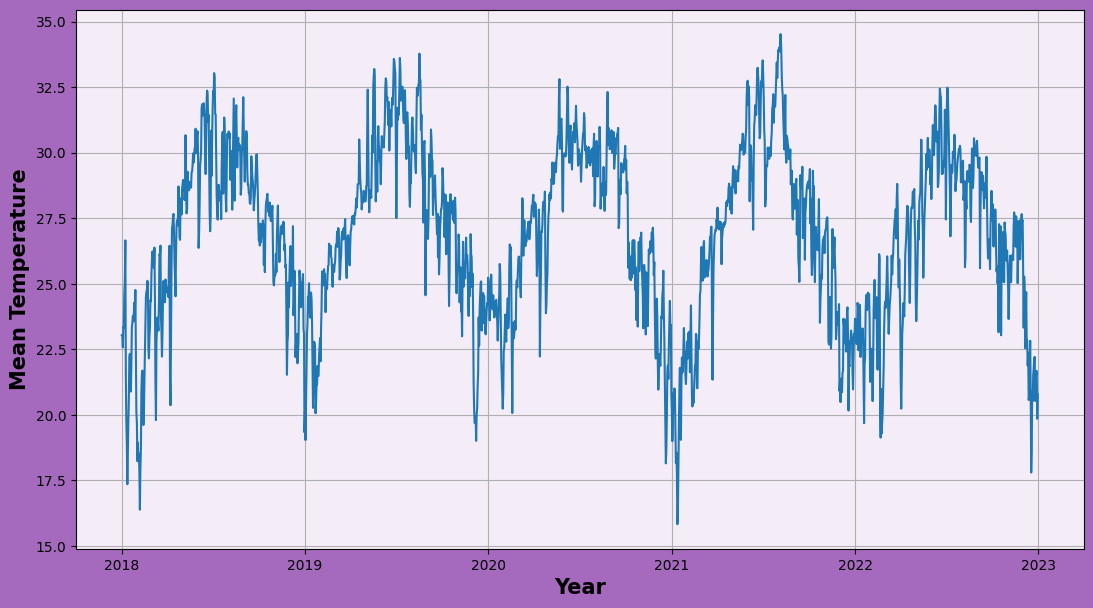

In [27]:
fig=plt.figure(figsize=(13,7),facecolor="#A569BD")
ax=plt.axes()
ax.set_facecolor("#F4ECF7")
plt.xlabel("Year",fontsize=15,fontweight="bold")
plt.ylabel("Mean Temperature",fontsize=15,fontweight="bold")
plt.grid(True)
plt.plot(daily)
plt.show()

In [28]:
print("Null values before:",daily.isnull().sum())

daily=daily.fillna(method="ffill")

print("Null values After:",daily.isnull().sum())

Null values before: 0
Null values After: 0


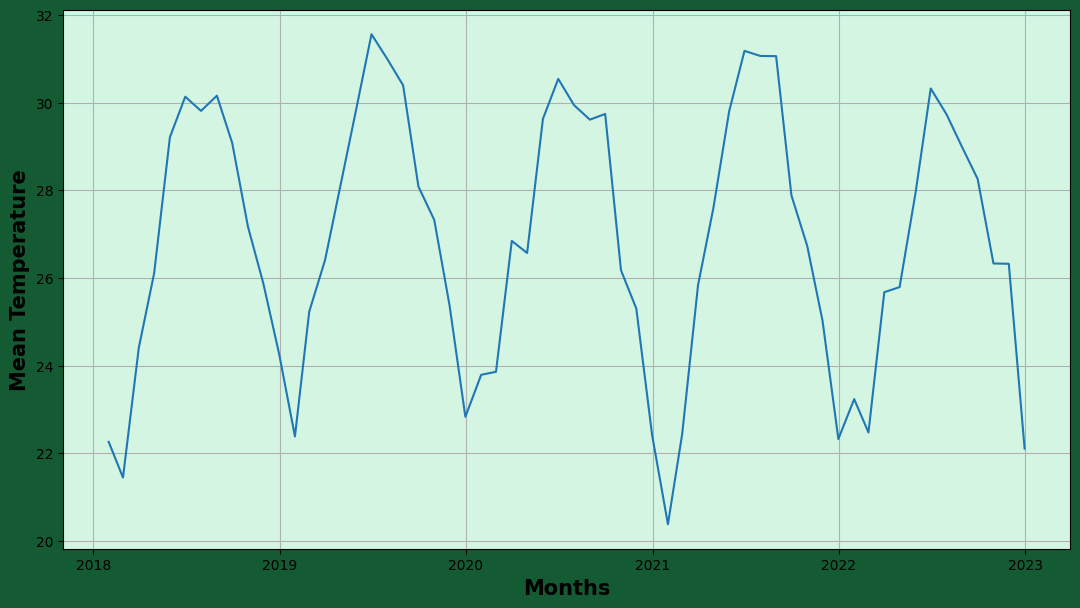

In [42]:
monthly=daily.resample("M").mean()
fig=plt.figure(figsize=(13,7),facecolor="#145A32")
ax=plt.axes()
ax.set_facecolor("#D5F5E3")
plt.plot(monthly)
plt.xlabel("Months",fontsize=15,fontweight="bold")
plt.ylabel("Mean Temperature",fontsize=15,fontweight="bold")
plt.grid(True)
plt.show()

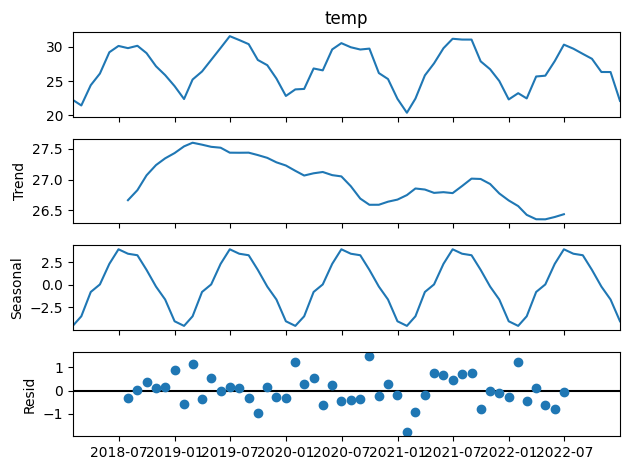

In [43]:
from statsmodels.tsa.seasonal import seasonal_decompose
result=seasonal_decompose(monthly)
result.plot()
plt.show()

In [44]:
monthly = monthly.to_frame(name='temp')

In [45]:
monthly

,temp
datetime,
2018-01-31,22.257258
2018-02-28,21.443006
2018-03-31,24.404839
2018-04-30,26.101250
2018-05-31,29.212769
2018-06-30,30.133889
2018-07-31,29.811022
2018-08-31,30.157930
2018-09-30,29.081250


In [46]:
import pandas as pd

monthly["Seasonal Diff"] = monthly['temp'] - monthly['temp'].shift(12)

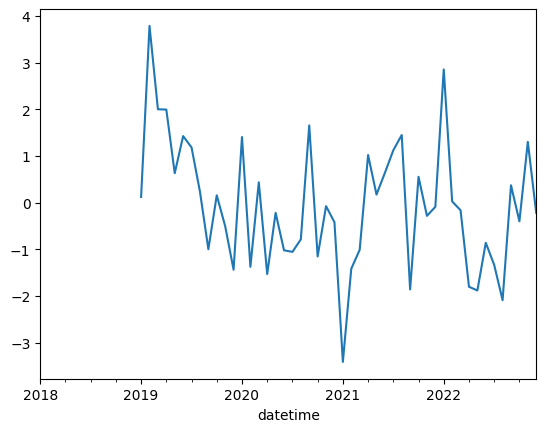

In [47]:
monthly["Seasonal Diff"].plot()
plt.show()

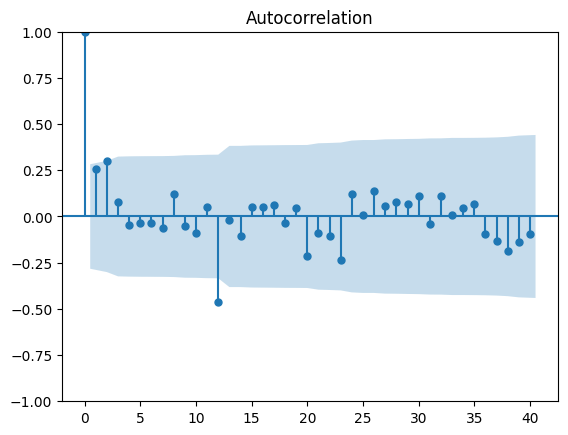

In [49]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(monthly["Seasonal Diff"].dropna(),lags=40)
plt.show()

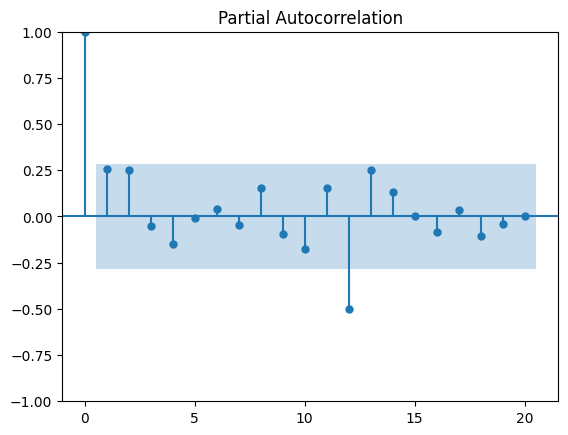

In [54]:
plot_pacf(monthly["Seasonal Diff"].dropna(),lags=20)
plt.show()

In [58]:
train=monthly["temp"][:"2021-01-01"].to_frame()
test=monthly["temp"]["2021-01-01":].to_frame()

train.shape,test.shape

((36, 1), (24, 1))

In [59]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model=SARIMAX(train,
              order=(1,0,0),
              seasonal_order=(0,1,1,12)
             ).fit()

C:\Users\OS\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


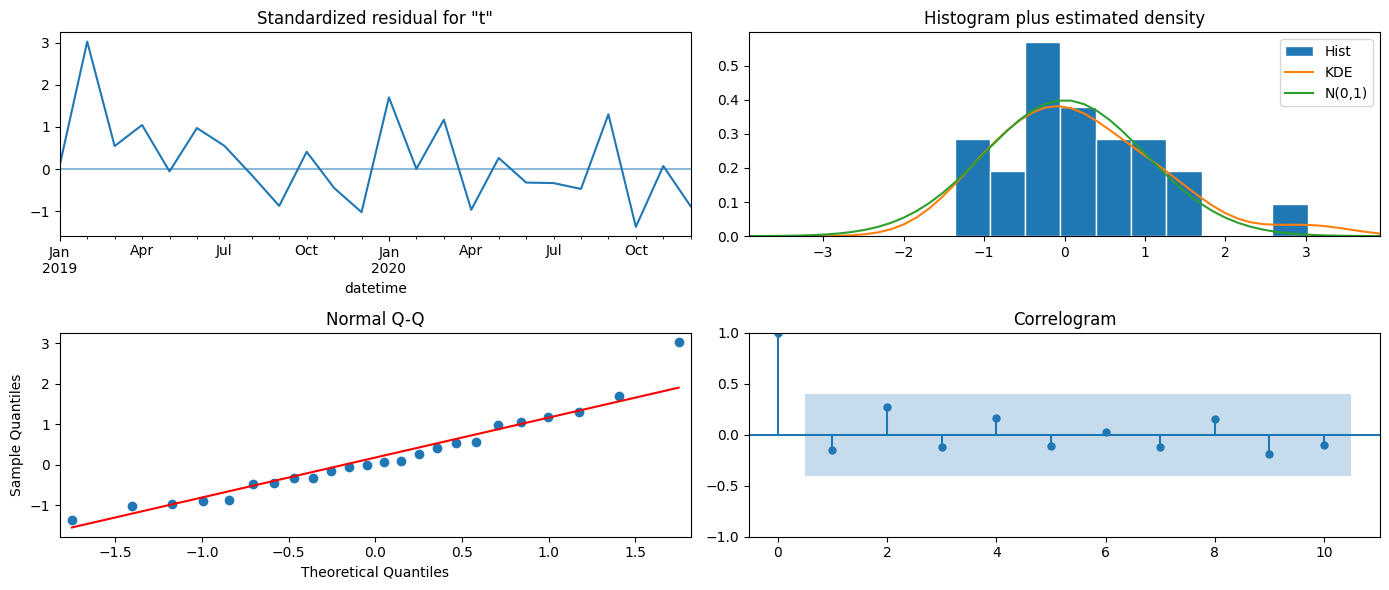

In [60]:
model.plot_diagnostics(figsize=(14,6))
plt.tight_layout()
plt.show()

In [61]:
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                 temp   No. Observations:                   36
Model:             SARIMAX(1, 0, 0)x(0, 1, [1], 12)   Log Likelihood                 -37.523
Date:                              Mon, 29 May 2023   AIC                             81.046
Time:                                      21:29:18   BIC                             84.580
Sample:                                  01-31-2018   HQIC                            81.984
                                       - 12-31-2020                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3496      0.273      1.279      0.201      -0.186       0.885
ma.S.L12      -0.9917     96.735     -0.010      0.992    -190.589     188.605
sigma2         0.7735     74.782      0.010      0.992    -145.796     147.343
===================================================================================
Ljung-Box (L1) (Q):                   0.62   Jarque-Bera (JB):                 3.80
Prob(Q):                              0.43   Prob(JB):                         0.15
Heteroskedasticity (H):               0.41   Skew:                             0.88
Prob(H) (two-sided):                  0.23   Kurtosis:                         3.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [11]:
def create_data(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps-3):
        v = X.iloc[i:i+time_steps].to_numpy()
        Xs.append(v)
        ys.append(y.iloc[i+time_steps:i+time_steps+3])
    return np.array(Xs), np.array(ys)

In [37]:
train_size = int(0.8*len(X))

X_train, y_train = create_data(X[:train_size], y.precipprob[:train_size], time_steps = 12)
X_test, y_test = create_data(X[train_size:], y.precipprob[train_size:], time_steps = 12)

In [38]:
y_train.shape

(35044, 3)

In [39]:
X_train.shape

(35044, 12, 12)

In [40]:
y_train

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       ...,
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]], dtype=int64)

In [41]:
from keras.models import Sequential
from keras.layers import *
from keras.layers import LSTM
from keras.layers import Dense
import math
from sklearn.metrics import mean_squared_error
from keras.optimizers import Adam


model = Sequential()

model.add(LSTM(50,return_sequences= True, input_shape=(X_train.shape[1], X_train.shape[2])))

model.add(Dense(32, activation='relu', input_shape=(12, 12)))
model.add(Flatten())  # Dùng Flatten để "đổ phẳng" đầu ra của layer trước
model.add(Dense(3, activation='linear'))

optimizer=Adam(learning_rate=0.0001)

model.compile(loss='mse', optimizer=optimizer)

model.fit(X_train,y_train, epochs=100, batch_size=32, shuffle=False)



Epoch 1/100
1096/1096 [==============================] - 6s 4ms/step - loss: 0.0605
Epoch 2/100
1096/1096 [==============================] - 5s 4ms/step - loss: 0.0392
Epoch 3/100
1096/1096 [==============================] - 5s 5ms/step - loss: 0.0326
Epoch 4/100
1096/1096 [==============================] - 5s 5ms/step - loss: 0.0293
Epoch 5/100
1096/1096 [==============================] - 5s 5ms/step - loss: 0.0275
Epoch 6/100
1096/1096 [==============================] - 5s 5ms/step - loss: 0.0262
Epoch 7/100
1096/1096 [==============================] - 5s 5ms/step - loss: 0.0254
Epoch 8/100
1096/1096 [==============================] - 5s 5ms/step - loss: 0.0249
Epoch 9/100
1096/1096 [==============================] - 5s 5ms/step - loss: 0.0245
Epoch 10/100
1096/1096 [==============================] - 5s 5ms/step - loss: 0.0241
Epoch 11/100
1096/1096 [==============================] - 5s 5ms/step - loss: 0.0238
Epoch 12/100
1096/1096 [==============================] - 5s 5ms/step - lo

In [42]:
y_test_pred = model.predict(X_test)

274/274 [==============================] - 1s 3ms/step


In [43]:
y_test.flatten().shape

(26250,)

In [44]:
from sklearn.metrics import accuracy_score
y_pred = y_test_pred.round().astype(int)
accuracy_score(y_test.flatten(), y_pred.flatten())

0.9627428571428571

In [26]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
r2_score(y_test.flatten(), y_test_pred.flatten())

0.7891918825707439

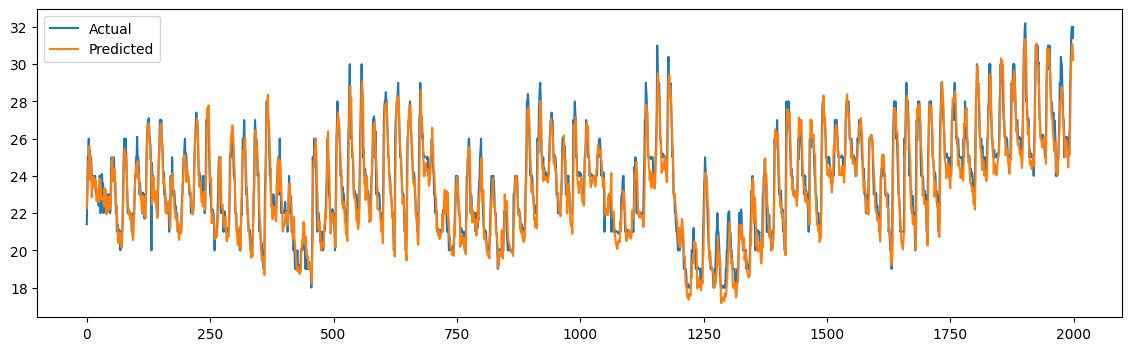

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 4))
plt.plot(y_test[0:2000], label="Actual")
plt.plot(y_test_pred[0:2000], label="Predicted")
plt.legend()
plt.show()

In [48]:
model.save('model_predict_precip.h5')

In [127]:
y_flatten = y_pred.flatten()
y_condition = (y_flatten)
y_test_inverse = (y_test.flatten())

In [128]:
value_counts1 = pd.Series(y_condition).value_counts()
value_counts2 = pd.Series(y_test_inverse).value_counts()
value_counts1, value_counts2

(1    7697
 2     879
 3     152
 4      19
 5       2
 0       1
 dtype: int64,
 1    7812
 2     544
 3     230
 4     155
 0       9
 dtype: int64)

In [129]:
y_test_pred.min()

0.4753799

In [50]:
y_test_pred.loc[y_test_pred<0]=0

AttributeError: 'numpy.ndarray' object has no attribute 'loc'

In [51]:
y_test_pred = np.clip(y_test_pred, a_min=0, a_max=None)

In [58]:
acc = []
for i in range(len(y_test_pred)):
    if y_pred[i] == y_test[i]:
        acc.append(1)
    else:
        acc.append(0)

In [64]:
index = []
for i in range(len(y_test)):
    index.append(i)

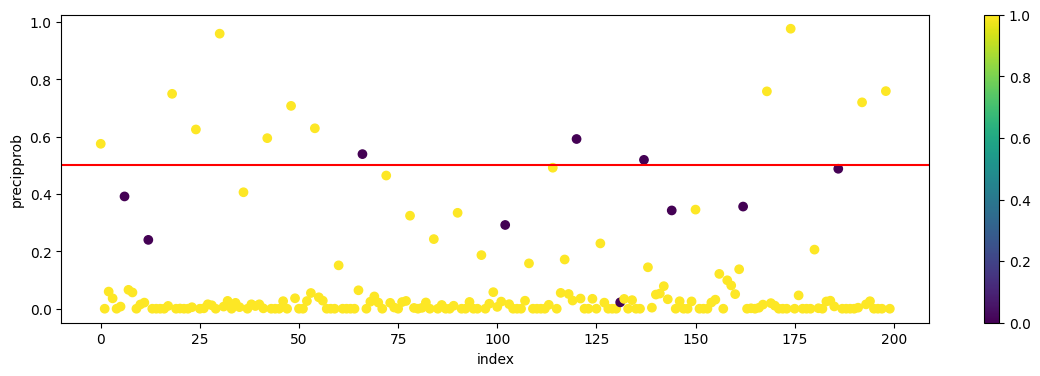

In [75]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 4))
plt.scatter(index[0:200], y_test_pred[0:200], c=acc[0:200])
plt.xlabel('index')
plt.ylabel('precipprob')
plt.colorbar()
plt.axhline(y=0.5, color='r')
plt.show()

In [49]:
import pandas as pd
import requests
import sys
import json
from datetime import datetime
from sklearn.preprocessing import LabelEncoder

#Đọc dataset
data = pd.read_csv('data_predict.csv')
data = data.drop(['datetime','icon'], axis=1)
data.shape, len(data)

#Lấy ngày giờ hiện tại
now = datetime.now()
ngay = now.strftime('%Y-%m-%d')
gio = now.strftime('%H')      

#Get dữ liệu hiện tại
response = requests.request("GET", f"https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/Da%20Nang/{ngay}/{ngay}?unitGroup=metric&include=hours&key=VD7W3KWW2N5KLCQCS5DZPAMHQ&contentType=json")
if response.status_code!=200:
  print('Unexpected Status code: ', response.status_code)
  sys.exit()  

# Parse the results as JSON
jsonData = response.json()

#Nối vào dataset
days = jsonData['days'][0]['hours'][int(gio)]
new_data = [days['temp'], days['dew'], days['humidity'], days['precip'], days['precipprob'], days['windspeed'], days['winddir'], days['cloudcover'], days['visibility'], days['solarradiation'],days['solarenergy'], days['uvindex'], days['conditions']]
data.loc[len(data)] = new_data

X = pd.DataFrame(data[['temp','dew','humidity','precip','windspeed','winddir','cloudcover','visibility','solarradiation','solarenergy','conditions','precipprob']])
encoder = LabelEncoder()

X['conditions'] = X['conditions'].replace('Clear', 0)
X['conditions'] = X['conditions'].replace('Partially cloudy', 1)
X['conditions'] = X['conditions'].replace('Overcast', 2)
X['conditions'] = X['conditions'].replace('Rain, Partially cloudy', 3)
X['conditions'] = X['conditions'].replace('Rain, Overcast', 4)
X.loc[X['precipprob']==100,'precipprob']=1


model_precip = keras.models.load_model('model_predict_precip.h5')
model_conditions = keras.models.load_model('model_predict_condition.h5')
model_temp = keras.models.load_model('model_predict_temp.h5')
X_test = X[-12:]
X_test = X_test.to_numpy().reshape(1,12,12)
y_precip_predict = model_precip.predict(X_test).flatten()
y_condition_predict = model_conditions.predict(X_test).flatten()
y_temp_predict = model_temp.predict(X_test).flatten()

y_precip_predict = y_precip_predict.flatten()
y_condition_predict = y_condition_predict.flatten()
y_temp_predict = y_temp_predict.flatten()
y_condition_predict = pd.Series(y_condition_predict.round().astype(int))
y_condition_predict = y_condition_predict.replace(0, 'Clear')
y_condition_predict = y_condition_predict.replace(1, 'Partially cloudy')
y_condition_predict = y_condition_predict.replace(2, 'Overcast')
y_condition_predict = y_condition_predict.replace(3, 'Rain, Partially cloudy')
y_condition_predict = y_condition_predict.replace(4, 'Rain, Overcast')
# y_predict_precip = list(y_predict[1::2])
# y_predict_conditions = encoder.inverse_transform(pd.Series(y_predict[::2].round().astype(int)))
# #Kết quả 3h tiếp theo
# print(y_predict_conditions, y_predict_precip)

print(y_precip_predict,list(y_condition_predict),y_temp_predict)

1/1 [==============================] - 0s 266ms/step
[-0.14576522  0.6253343   0.38447344] ['Partially cloudy', 'Overcast', 'Partially cloudy'] [27.480894 27.334246 26.771044]


In [2]:
import pandas as pd
import requests
import sys
import json
from datetime import datetime
from sklearn.preprocessing import LabelEncoder
import numpy as np
# #Đọc dataset
# data = pd.read_csv('data_predict.csv')
# data = data.drop(['datetime','icon'], axis=1)
# data.shape, len(data)

#Lấy ngày giờ hiện tại
now = datetime.now()
ngay = now.strftime('%Y-%m-%d')
gio = now.strftime('%H')      
print(now)
#Get dữ liệu hiện tại
response = requests.request("GET", f"https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/Da%20Nang/{ngay}/{ngay}?unitGroup=metric&include=hours&key=VD7W3KWW2N5KLCQCS5DZPAMHQ&contentType=json")
if response.status_code!=200:
  print('Unexpected Status code: ', response.status_code)
  sys.exit()  

# Parse the results as JSON
jsonData = response.json()
#Nối vào dataset
for i in range(12):
  days = jsonData['days'][0]['hours'][int(gio)-i]
  new_data = [days['temp'], days['dew'], days['humidity'], days['precip'], days['precipprob'], days['windspeed'], days['winddir'], days['cloudcover'], days['visibility'], days['solarradiation'],days['solarenergy'], days['uvindex'], days['conditions']]
  # data.loc[len(data)+i] = new_data
  print(days,new_data)

2023-05-31 13:12:04.736218
{'datetime': '13:00:00', 'datetimeEpoch': 1685512800, 'temp': 30.8, 'feelslike': 35.6, 'humidity': 65.14, 'dew': 23.5, 'precip': 0.0, 'precipprob': 0.0, 'snow': None, 'snowdepth': None, 'preciptype': None, 'windgust': 21.6, 'windspeed': 23.0, 'winddir': 45.8, 'pressure': 1003.0, 'visibility': 24.1, 'cloudcover': 6.2, 'solarradiation': 973.0, 'solarenergy': 3.5, 'uvindex': 10.0, 'severerisk': 30.0, 'conditions': 'Clear', 'icon': 'clear-day', 'stations': None, 'source': 'fcst'} [30.8, 23.5, 65.14, 0.0, 0.0, 23.0, 45.8, 6.2, 24.1, 973.0, 3.5, 10.0, 'Clear']
{'datetime': '12:00:00', 'datetimeEpoch': 1685509200, 'temp': 34.0, 'feelslike': 41.9, 'humidity': 59.53, 'dew': 25.0, 'precip': 0.0, 'precipprob': 0.0, 'snow': 0.0, 'snowdepth': None, 'preciptype': None, 'windgust': 20.5, 'windspeed': 9.4, 'winddir': 50.0, 'pressure': 1004.0, 'visibility': 10.0, 'cloudcover': 25.0, 'solarradiation': 990.0, 'solarenergy': 3.6, 'uvindex': 10.0, 'severerisk': 3.0, 'conditions':